# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Three observable trends:

1) Most of the wind speeds are below 25mph
2) Humidity and wind speed are clearly not affected by Latitude.
3) 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats

import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_found = []
clouds = []
country = []
humidity = []
max_temp = []
wind = []
lat = []
lon = []



url = "http://api.openweathermap.org/data/2.5/weather?"
print(f'''Beginning Data Retrieval     
-----------------------------''')

for city in cities:
#city = "hermanus"
    endpoint = f"{url}appid={weather_api_key}&units=Imperial&q={city}"
    response = requests.get(endpoint).json()

    try:
        print(f"Processing Record ID {response['id']} | {response['name']}")
        cities_found.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])        
        wind.append(response["wind"]["speed"])
        
    
    except:
        print(f"{city} not found. Skipping...")

    continue

print(f'''-----------------------------
Data Retrieval Complete      
-----------------------------
''')

Beginning Data Retrieval     
-----------------------------
Processing Record ID 3883457 | Lebu
Processing Record ID 964432 | Port Alfred
Processing Record ID 3394023 | Natal
Processing Record ID 4030556 | Rikitea
Processing Record ID 3120211 | Jaca
Processing Record ID 103630 | Najrān
Processing Record ID 2068110 | Kununurra
Processing Record ID 3874787 | Punta Arenas
Processing Record ID 2075265 | Busselton
taolanaro not found. Skipping...
Processing Record ID 2082539 | Merauke
Processing Record ID 6201424 | Mataura
Processing Record ID 3356832 | Henties Bay
Processing Record ID 6111696 | Port-Cartier
Processing Record ID 1015776 | Bredasdorp
Processing Record ID 2307795 | Mongomo
aporawan not found. Skipping...
Processing Record ID 3366880 | Hermanus
Processing Record ID 2094342 | Kavieng
Processing Record ID 5847411 | Kahului
Processing Record ID 2729907 | Longyearbyen
Processing Record ID 5859699 | College
Processing Record ID 3369157 | Cape Town
Processing Record ID 1260880 | Pah

Processing Record ID 2177233 | Bairnsdale
Processing Record ID 779554 | Honningsvåg
Processing Record ID 352733 | Marsá Maţrūḩ
Processing Record ID 3359638 | Walvis Bay
Processing Record ID 3430443 | Necochea
vaitupu not found. Skipping...
Processing Record ID 86049 | Jalu
Processing Record ID 2063036 | Port Lincoln
Processing Record ID 2038067 | Chifeng
Processing Record ID 1054329 | Vangaindrano
Processing Record ID 3837213 | San Juan
Processing Record ID 1529484 | Kumul
Processing Record ID 5848280 | Kapaa
Processing Record ID 6158023 | Strathmore
Processing Record ID 2132606 | Samarai
Processing Record ID 1040652 | Maputo
Processing Record ID 2181988 | Takapau
Processing Record ID 3451138 | Rio Grande
Processing Record ID 496358 | Severnyy
Processing Record ID 760924 | Puławy
Processing Record ID 1494941 | Pirovskoye
Processing Record ID 1524801 | Shīeli
Processing Record ID 556268 | Ostrovnoy
Processing Record ID 677557 | Gavojdia
mocambique not found. Skipping...
Processing Recor

tiruvottiyur not found. Skipping...
Processing Record ID 3893726 | Constitución
Processing Record ID 3980180 | Frontera
Processing Record ID 580660 | Asha
Processing Record ID 1491461 | Soloneshnoye
Processing Record ID 934649 | Cap Malheureux
Processing Record ID 189741 | Lamu
Processing Record ID 866062 | Iskateley
Processing Record ID 3580733 | Bodden Town
Processing Record ID 1179834 | Dijkot
Processing Record ID 236901 | Ouadda
Processing Record ID 1258406 | Rāpar
Processing Record ID 3628473 | San Cristobal
Processing Record ID 1855540 | Naze
Processing Record ID 1492110 | Shitkino
Processing Record ID 1489499 | Togur
Processing Record ID 215976 | Ilebo
dzhusaly not found. Skipping...
Processing Record ID 3375941 | Skeldon
Processing Record ID 2303611 | Esim
Processing Record ID 3860443 | Comodoro Rivadavia
Processing Record ID 1152227 | Mae Chan
Processing Record ID 3664716 | Canutama
Processing Record ID 2138555 | Poum
Processing Record ID 2774347 | Kitzbühel
Processing Record 

Processing Record ID 3355672 | Lüderitz
Processing Record ID 1283334 | Birin
Processing Record ID 1567788 | Soc Trang
Processing Record ID 3929611 | San Jerónimo
Processing Record ID 2038529 | Baishishan
Processing Record ID 1150085 | Thung Song
Processing Record ID 2351979 | Agbor
bolungarvik not found. Skipping...
Processing Record ID 1852357 | Shimoda
Processing Record ID 4391812 | Independence
Processing Record ID 3472177 | Angra dos Reis
Processing Record ID 1493467 | Rubtsovsk
Processing Record ID 3692020 | Saquena
Processing Record ID 3899695 | Ancud
louisbourg not found. Skipping...
Processing Record ID 3393536 | Olinda
Processing Record ID 863061 | Usinsk
Processing Record ID 1283285 | Jumla
Processing Record ID 1509844 | Boguchany
Processing Record ID 235826 | Zemio
Processing Record ID 161974 | Bereket
sug-aksy not found. Skipping...
Processing Record ID 3393692 | Itarema
Processing Record ID 4026082 | Lázaro Cárdenas
Processing Record ID 3160881 | Bodø
Processing Record ID 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
wdf = pd.DataFrame({
    "City": cities_found,
    "Country": country,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Latitude": lat,
    "Longitude":lon
    
})

In [5]:
wdf.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Lebu,CL,50.83,84,100,11.36,-37.62,-73.65
1,Port Alfred,ZA,63.39,87,85,13.33,-33.59,26.89
2,Natal,BR,78.80,78,75,9.17,-5.79,-35.21
3,Rikitea,PF,75.60,83,100,16.42,-23.12,-134.97
4,Jaca,ES,45.00,89,36,0.96,42.57,-0.55


In [6]:
wdf.count()

City          591
Country       591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Latitude      591
Longitude     591
dtype: int64

In [7]:
wdf.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

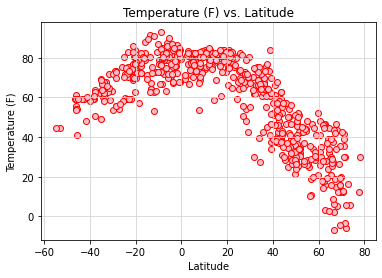

In [8]:
plt.scatter(lat,max_temp,edgecolors="red",facecolors="pink",)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("output_data/Temperature.png")
plt.style.use('ggplot')
plt.show()

#### Latitude vs. Humidity Plot

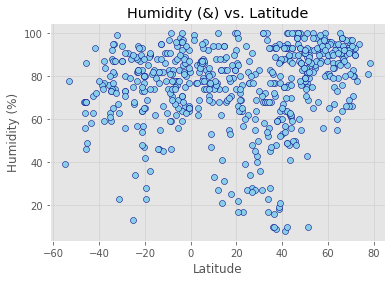

In [9]:
plt.scatter(lat,humidity,edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (&) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("output_data/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

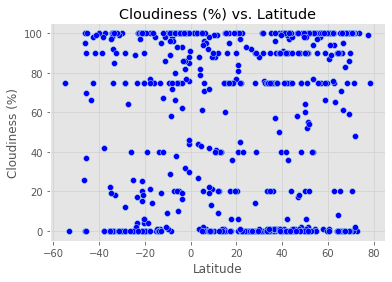

In [10]:
plt.scatter(lat,clouds,edgecolors="lightblue",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("output_data/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

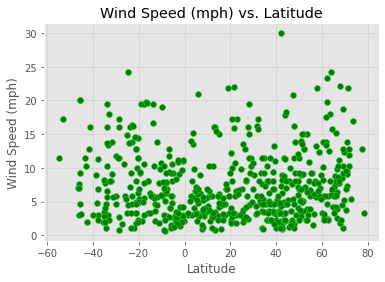

In [11]:
plt.scatter(lat,wind,edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.style.use('ggplot')
plt.savefig("output_data/Wind_Speed.png")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern = wdf.loc[wdf["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = wdf.loc[wdf["Latitude"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

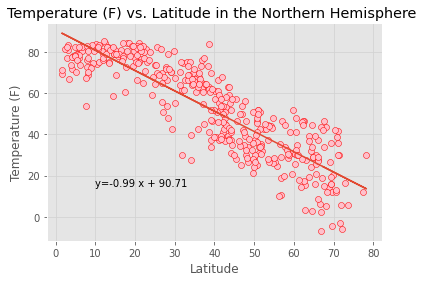

The r-squared is: -0.8693055891144486


In [22]:
plt.scatter(northern["Latitude"], northern["Max Temp"],edgecolors="red",facecolors="pink",)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude in the Northern Hemisphere ")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Max Temp"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (10,15))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

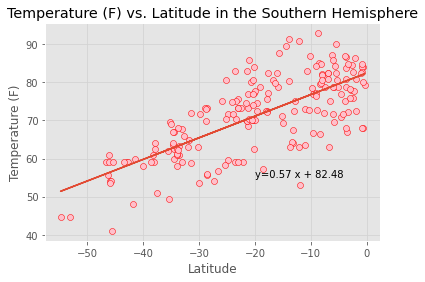

The r-squared is: 0.7307910324546887


In [23]:
plt.scatter(southern["Latitude"], southern["Max Temp"],edgecolors="red",facecolors="pink")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Max Temp"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-20,55))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

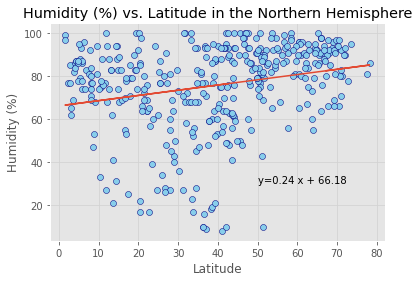

The r-squared is: 0.23453277123058905


In [24]:
plt.scatter(northern["Latitude"], northern["Humidity"],edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Humidity"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])



line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (50,30))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

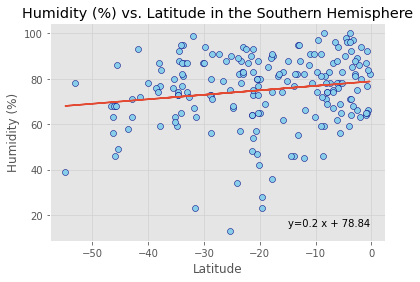

The r-squared is: 0.16893267281000635


In [25]:
plt.scatter(southern["Latitude"], southern["Humidity"],edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Humidity"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-15,15))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

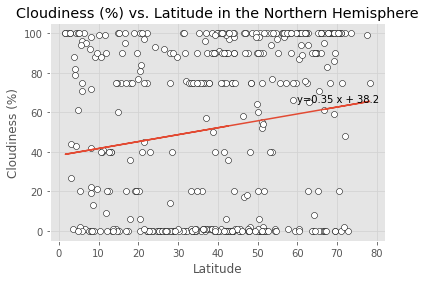

The r-squared is: 0.16378778461866314


In [26]:
plt.scatter(northern["Latitude"], northern["Cloudiness"],edgecolors="black",facecolors="white")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Cloudiness"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])



line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (60,65))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

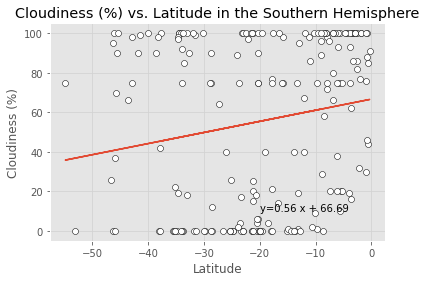

The r-squared is: 0.18121209326188836


In [27]:
plt.scatter(southern["Latitude"], southern["Cloudiness"],edgecolors="black",facecolors="white")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Cloudiness"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-20,10))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

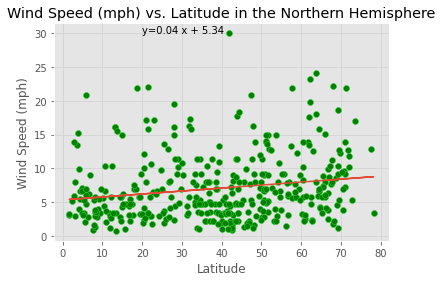

The r-squared is: 0.17869485515478437


In [28]:
plt.scatter(northern["Latitude"], northern["Wind Speed"],edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Wind Speed (mph) vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Wind Speed"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])

line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (20,30))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

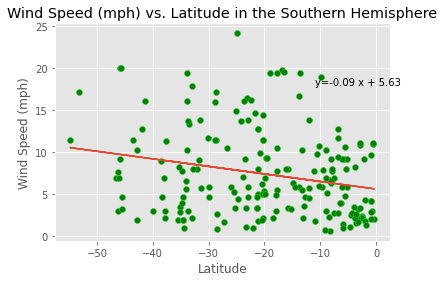

The r-squared is: -0.23532245228612317


In [29]:
plt.scatter(southern["Latitude"], southern["Wind Speed"],edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="white")
plt.title(f"Wind Speed (mph) vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Wind Speed"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])

line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"

plt.annotate(line_eq, (-11,18))
plt.show()

print(f"The r-squared is: {rvalue}")